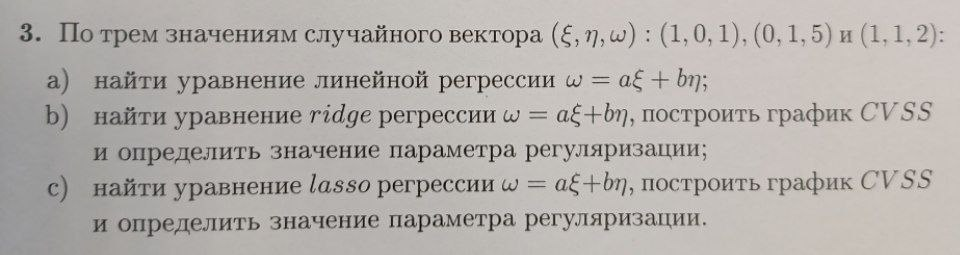

In [25]:
from IPython.display import Image

Image("images/task_3.jpg")

***a)***

In [26]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

table = pd.DataFrame({
    'xi' : [1, 0, 1],
    'eta' : [0, 1, 1],
    'omega' : [1, 5, 2]
})

psi = table.drop('omega', axis=1)
model = sm.OLS(table['omega'], psi).fit()
print(f"ω = {model.params[0]:.2f}*ξ + {model.params[1]:.2f}*η")

ω = -0.33*ξ + 3.67*η


/tmp/ipykernel_63115/1875786263.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"ω = {model.params[0]:.2f}*ξ + {model.params[1]:.2f}*η")


***b)***

alpha_optimal = 1.51
ω = 0.3118*ξ + 1.9055*η


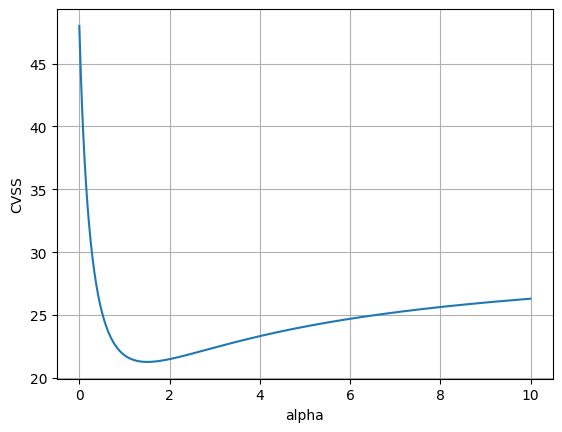

In [27]:
CVSS = []
alphas = []
for i in range(1000):
    alpha = i / 100
    alphas.append(alpha)
    CVSS_i = 0
    for j in range(3):
        model = Ridge(alpha=alpha, fit_intercept=False).fit(psi.drop(j), table['omega'].drop(j))
        CVSS_i += (table['omega'].loc[j] - model.coef_ @ psi.loc[j]) ** 2
    CVSS.append(CVSS_i)

alpha_optimal = alphas[CVSS.index(min(CVSS))]

model_optimal = Ridge(alpha=alpha_optimal, fit_intercept=False).fit(psi, table['omega'])
print(f'alpha_optimal = {alpha_optimal}')
print(f"ω = {model_optimal.coef_[0]:.4f}*ξ + {model_optimal.coef_[1]:.4f}*η")

plt.plot(alphas, CVSS)
plt.ylabel('CVSS')
plt.xlabel('alpha')
plt.grid(True)
plt.show()

***c)***

alpha_optimal = 1.5
ω = 0.0000*ξ + 1.2500*η


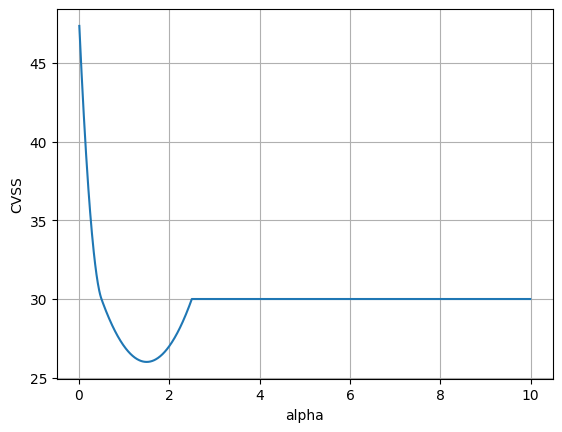

In [28]:
CVSS = []
alphas = []
for i in range(1, 1000):
    alpha = i / 100
    alphas.append(alpha)
    CVSS_i = 0
    for j in range(3):
        model = Lasso(alpha=alpha, fit_intercept=False).fit(psi.drop(j), table['omega'].drop(j))
        CVSS_i += (table['omega'].loc[j] - model.coef_ @ psi.loc[j]) ** 2
    CVSS.append(CVSS_i)

alpha_optimal = alphas[CVSS.index(min(CVSS))]
model_optimal = Lasso(alpha=alpha_optimal, fit_intercept=False).fit(psi, table['omega'])
print(f'alpha_optimal = {alpha_optimal}')
print(f"ω = {model_optimal.coef_[0]:.4f}*ξ + {model_optimal.coef_[1]:.4f}*η")

plt.plot(alphas, CVSS)
plt.xlabel('alpha')
plt.ylabel('CVSS')
plt.grid(True)
plt.show()